# Exercise 1: Computer Security - Simple authentication scheme [1]

In [625]:
import numpy as np 
from scipy import linalg
import random 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Q1

In [626]:
x=[1,0,1,1,1]

In [627]:
c1=[0,1,0,1,1]
c2=[1,1,1,1,0]

In [628]:
print(np.dot(x, c1)%2) 

0


In [629]:
print(np.dot(x, c2)%2) 

1


# Q2

In [630]:
beta1= (np.dot(x, c1)%2) 
beta2= (np.dot(x, c2)%2) 

In [631]:
beta3_add=((beta1+beta2)%2)

In [632]:
c3=(np.add(c1,c2)%2)

In [633]:
beta3_dot =(np.dot(x, c3)%2) 

In [634]:
if(beta3_add == beta3_dot):
    print("Eve got the correct response!")

Eve got the correct response!


# Q3

In [635]:
c3 = [1,1,0,0,1,1]
c4 = [1,0,1,0,1,0]
c5 = [1,1,1,0,1,1]
c6 = [0,0,1,1,0,0]

r3 = 0
r4 = 0
r5 = 1
r6 = 1

ca = [0,1,1,0,0,1]
cb = [1,1,0,1,1,1]

In [636]:
tempc=(np.add(c3,c4)%2)

In [637]:
if(np.array_equal(tempc,ca)):
    print("Response for ca should be "+str((r3+r4)%2))


Response for ca should be 0


In [638]:
tempc=(np.add(c5,c6)%2)

In [639]:
if(np.array_equal(tempc,cb)):
    print("Response for cb should be "+str((r5+r6)%2))

Response for cb should be 0


# Q4


In [640]:
c7 = [0,1,1,0,1,1]
c8 = [1,1,0,1,0,0]

r7 = 0
r8 = 1

In [641]:
a = np.array([c3,c4,c5,c6,c7,c8])
b = np.array([r3,r4,r5,r6,r7,r8])

x = (linalg.solve(a, b)%2)
x

array([1., 0., 1., 0., 0., 1.])

# Exercise 2: Machine learning – Linear regression

# Q5

In [642]:
data = np.array( [[0.846 , 115.00],
                 [1.324 , 234.50],
                 [1.150 , 198.00],
                 [3.037 , 528.00],
                 [3.984 , 572.50]])

x = np.array( [0.846 , 1.324 ,1.150 , 3.037 ,3.984 ])

y = np.array( [115.00,234.50,198.00,528.00, 572.50])

In [643]:
a1= np.sum(x*x)
a2 = np.sum(x)
a3 = a2
a4 = 5

In [644]:
A = [[a1,a2],[a3,a4]]
A

[[28.886817, 10.341], [10.341, 5]]

In [645]:
b1 = np.sum(y*x)
b2 = np.sum(y)

In [646]:
B = [b1,b2]
B

[4519.844, 1648.0]

In [647]:
Ans = np.dot(np.linalg.inv(A),B)

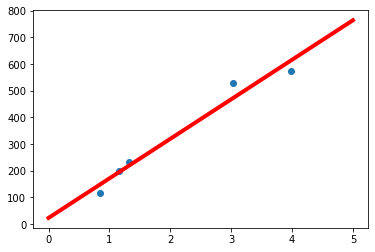

In [648]:
xs = np.linspace(0,5,5)
ys = Ans[1] + Ans[0]*xs
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y)
plt.show()

# Q6


In [649]:
x1 = [0.846,1.324,1.150,3.037,3.984]
x2 = [1,2,3,4,5]
y = [115.00,234.50,198.00,528.00,572.50]

# X = [[1,1,1,1,1],x1,x2]
X = [[1,0.846,1],[1,1.324,2],[1,1.150,3],[1,3.037,4],[1,3.984,5]]

X = np.array(X)
Y = np.array(y)

In [650]:
# A = (np.linalg.lstsq(X, y,rcond=None))[0]

In [651]:
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# a
predictedY

array([136.98030068, 215.89774347, 209.61722022, 472.65112643,
       612.8536092 ])

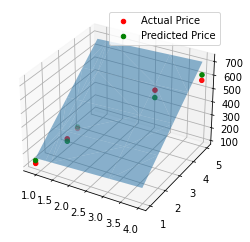

In [652]:
# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 1], X[:, 2], X[:, 0])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.scatter(X[:, 1], X[:, 2], Y, color='r', label='Actual Price')
ax.scatter(X[:, 1], X[:, 2], predictedY, color='g', label='Predicted Price')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.legend()
plt.show()

# Exercise 3: Cryptography – Threshold secret sharing [1]

# Q7

In [841]:
# Function to create random binary string of length p
def rand_key(p): 
    
    # Variable to store in an array 
    key = []
  
    # Loop to find the string 
    # of desired length 
    for i in range(p): 
          
        # randint function to generate 
        # 0, 1 randomly and add  
        # the result into arry
        key.append(random.randint(0, 1)) 
    return(key) 

In [842]:
a0 = [1,1,0,1,0,1]
b0 = [1,1,0,0,1,1]

In [843]:
def random_vector(s,t):
    u = []
    while True:
        u = rand_key(6)
        if((((np.dot(u,a0)%2)==s) and ((np.dot(u,b0)%2)==t))):
           return (u)

In [1128]:
# Function to check if the generated vectors fulfil the independency requirements
#input two lists a & b, each contains 4 vectors
#Return "True" if any 3 pairs of vectors from (a1,b1),(a2,b2),(a3,b3),(a4,b4) are linearly independent
def check_dependency(a,b): 
    # 
    for v1 in range(0,2): #1st vector from 1 to 2
        for v2 in range(v1+1,3): 
            for v3 in range(v2+1,4): 
#                 print(v1,v2,v3)
                squareMatrix = np.vstack((a[v1],b[v1],a[v2],b[v2],a[v3],b[v3]))
                determinant = np.linalg.det(squareMatrix) 
                if determinant == 0: #if determinant is 0, the vectors are not linearly dependent
                    return False

    # check if a0,b0 and any two random selected pairs of vectors are linearly independent
#     for v1 in range(0,3): #1st vector from 1 to 3
#         for v2 in range(v1+1,4):
#             squareMatrix = np.vstack((a0, b0, a[v1], b[v1], a[v2], b[v2]))
#             determinant = np.linalg.det(squareMatrix) 
#             if determinant == 0: #if determinant is 0, the vectors are not linearly dependent
#                 return False
    return True



In [1129]:
#Generating a1, b1, a2, b2, a3, b3, a4, b4
a=[]
b=[]

while True:
    a.append(rand_key(6))
    a.append(rand_key(6))
    a.append(rand_key(6))
    a.append(rand_key(6))
    b.append(rand_key(6))
    b.append(rand_key(6))
    b.append(rand_key(6))
    b.append(rand_key(6))
#     print(a)
#     print(b)
    if(check_dependency(a,b)):
        break
    else:
        a = []
        b = []
    
    

In [1130]:
a

[[0, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 0],
 [1, 0, 1, 0, 1, 1]]

In [1131]:
b

[[1, 0, 1, 0, 0, 1],
 [0, 1, 0, 0, 1, 0],
 [0, 0, 1, 0, 1, 1],
 [0, 0, 0, 1, 1, 0]]

In [1132]:
# Function to converting String to binary array
def str2bits(s): 
    res = ''.join(format(ord(i), 'b') for i in s) 
    bitsArray = []
    for i in res:
        bitsArray.append(int(i))
    return bitsArray

In [1133]:
password = str2bits("Potter")
print(password)
n= int(len(password)/2)

[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]


In [1134]:
password = np.reshape(password,(n,2))

In [1135]:
u=[]
for i in range (n):
    u.append(random_vector(password[i][0],password[i][1]))

In [1136]:
beta_1 = []
gamma_1 = []

beta_2 = []
gamma_2 = []

beta_3 = []
gamma_3 = []

beta_4 = []
gamma_4 = []

for i in range (n):
    beta_1.append(np.dot(u[i],a[0])%2)
    gamma_1.append(np.dot(u[i],b[0])%2)
    
    beta_2.append(np.dot(u[i],a[1])%2)
    gamma_2.append(np.dot(u[i],b[1])%2)
    
    beta_3.append(np.dot(u[i],a[2])%2)
    gamma_3.append(np.dot(u[i],b[2])%2)
    
    beta_4.append(np.dot(u[i],a[3])%2)
    gamma_4.append(np.dot(u[i],b[3])%2)

In [1145]:
FinAns = []
for i in range(n):
    temp = random.sample([0,1,2,3],3)
    temp.sort()
    A = [a[temp[0]],b[temp[0]],a[temp[1]],b[temp[1]],a[temp[2]],b[temp[2]]]
#     A = [a[0],b[0],a[1],b[1],a[2],b[2]]
#     B = [beta_1[i],gamma_1[i],beta_2[i],gamma_2[i],beta_3[i],gamma_3[i]]
    B = []

    if(temp[0]==0):
        if(temp[1]==1):
            if(temp[2]==2):
                B = [beta_1[i],gamma_1[i],beta_2[i],gamma_2[i],beta_3[i],gamma_3[i]]
            else:
                B = [beta_1[i],gamma_1[i],beta_2[i],gamma_2[i],beta_4[i],gamma_4[i]]
        else:
            B = [beta_1[i],gamma_1[i],beta_3[i],gamma_3[i],beta_4[i],gamma_4[i]]
    else:
        B = [beta_2[i],gamma_2[i],beta_3[i],gamma_3[i],beta_4[i],gamma_4[i]]
#     print(A)
#     print(B)
    FinAns.append(int(np.dot(a0,np.linalg.solve(A,B)%2)%2))
    FinAns.append(int(np.dot(b0,np.linalg.solve(A,B)%2)%2))
    

In [1146]:
print(FinAns)

[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0]


In [1147]:
# Function to converting binary array to String

def bits2str(b):
    NumOfChar = int(len(b)/7)
    string = ''
    for i in range(NumOfChar):
        bitsChar = ''.join(str(j) for j in b[7*i:7*i+7]) # 7 digits represents 1 char
        decimalChar = int(bitsChar,2) #convert binary to decimal
        string = string + chr(decimalChar) #convert decimal to string
    return string

    

In [1148]:
print(bits2str(FinAns))

Potter
